In [1]:
!pip install osmnx folium networkx geopandas -q
import osmnx as ox
import networkx as nx
import folium
import matplotlib.pyplot as plt
import pandas as pd

# Настройки вывода
ox.settings.log_console = True
ox.settings.use_cache = True

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 2.0 MB/s eta 0:00:00


🔄 Загружаем данные в радиусе 15.0 км от центра Кызылорды...
✅ Граф успешно загружен: 4444 узлов, 12496 рёбер


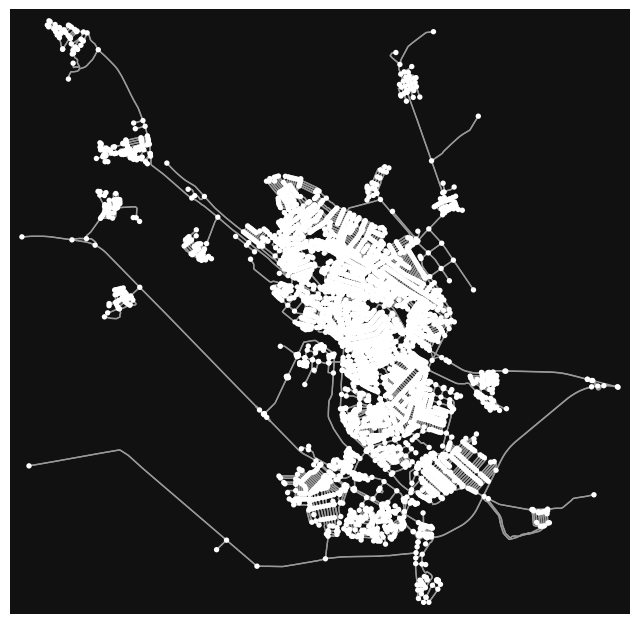

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
# координаты центра Кызылорды
center_lat, center_lon = 44.8488, 65.4823   # центр города

# радиус в метрах
radius = 15000

print(f"🔄 Загружаем данные в радиусе {radius/1000} км от центра Кызылорды...")
G = ox.graph_from_point((center_lat, center_lon), dist=radius, network_type='drive')

# Проверяем основную информацию вручную
num_nodes = len(G.nodes)
num_edges = len(G.edges)
print(f"✅ Граф успешно загружен: {num_nodes} узлов, {num_edges} рёбер")

# Быстрый просмотр карты
ox.plot_graph(ox.project_graph(G))


In [4]:
nodes, edges = ox.graph_to_gdfs(G)
print("🔹 Узлы:", len(nodes))
print("🔹 Рёбра:", len(edges))

edges.head()


🔹 Узлы: 4444
🔹 Рёбра: 12496


osmid      highway  \
u         v          key                                                   
535060332 4488510704 0                            243215070      primary   
          4579441038 0    [117506706, 243215069, 243215070]      primary   
          4488511540 0                            452051413  residential   
535060609 4505979299 0                            117506702      primary   
          4488510123 0                            243215070      primary   

                                        name   ref  oneway reversed  \
u         v          key                                              
535060332 4488510704 0    Кызылорда-Павлодар  A-17   False    False   
          4579441038 0    Кызылорда-Павлодар  A-17   False     True   
          4488511540 0                   NaN   NaN   False    False   
535060609 4505979299 0    Кызылорда-Павлодар  A-17   False    False   
          4488510123 0    Кызылорда-Павлодар  A-17   False     True   

                              length  \
u         v          key               
535060332 4488510704 0    179.440413   
          4579441038 0     82.056701   
          4488511540 0     58.089443   
535060609 4505979299 0    103.328988   
          4488510123 0     53.625269   

                                                                   geometry  \
u         v          key                                                      
535060332 4488510704 0    LINESTRING (65.54585 44.87785, 65.54573 44.877...   
          4579441038 0    LINESTRING (65.54585 44.87785, 65.546 44.87789...   
          4488511540 0    LINESTRING (65.54585 44.87785, 65.54594 44.878...   
535060609 4505979299 0     LINESTRING (65.54062 44.87531, 65.54129 44.8745)   
          4488510123 0    LINESTRING (65.54062 44.87531, 65.54095 44.875...   

                         bridge lanes maxspeed junction width tunnel  
u         v          key                                              
535060332 4488510704 0      NaN   NaN      NaN      NaN   NaN    NaN  
          4579441038 0      yes   NaN      NaN      NaN   NaN    NaN  
          4488511540 0      NaN   NaN      NaN      NaN   NaN    NaN  
535060609 4505979299 0      NaN   NaN      NaN      NaN   NaN    NaN  
          4488510123 0      NaN   NaN      NaN      NaN   NaN    NaN

In [5]:
nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
535060332,44.877850,65.545847,3,NaN,POINT (65.54585 44.87785)
535060609,44.875305,65.540625,3,NaN,POINT (65.54062 44.87531)
535061581,44.825243,65.560342,3,NaN,POINT (65.56034 44.82524)
726163723,44.823699,65.524985,4,traffic_signals,POINT (65.52499 44.8237)
726163726,44.778407,65.480977,4,NaN,POINT (65.48098 44.77841)


In [7]:
type(nodes)
type(edges)

geopandas.geodataframe.GeoDataFrame

In [8]:
edges_df = pd.DataFrame(edges.drop(columns='geometry'))
nodes_df = pd.DataFrame(nodes.drop(columns='geometry'))

In [9]:
edges_df

osmid      highway  \
u           v           key                                                   
535060332   4488510704  0                            243215070      primary   
            4579441038  0    [117506706, 243215069, 243215070]      primary   
            4488511540  0                            452051413  residential   
535060609   4505979299  0                            117506702      primary   
            4488510123  0                            243215070      primary   
...                                                        ...          ...   
13120415022 4516909217  0                            113615062      primary   
            13120415023 0                           1427229088  residential   
13120415023 4516909182  0                           1184938826  residential   
            13120415022 0                           1427229088  residential   
            11006993210 0                           1184938826  residential   

                                               name   ref  oneway reversed  \
u           v           key                                                  
535060332   4488510704  0        Кызылорда-Павлодар  A-17   False    False   
            4579441038  0        Кызылорда-Павлодар  A-17   False     True   
            4488511540  0                       NaN   NaN   False    False   
535060609   4505979299  0        Кызылорда-Павлодар  A-17   False    False   
            4488510123  0        Кызылорда-Павлодар  A-17   False     True   
...                                             ...   ...     ...      ...   
13120415022 4516909217  0    Сұлтан Бейбарыс көшесі  A-17   False     True   
            13120415023 0                       NaN   NaN   False     True   
13120415023 4516909182  0                       NaN   NaN   False    False   
            13120415022 0                       NaN   NaN   False    False   
            11006993210 0                       NaN   NaN   False     True   

                                 length bridge lanes maxspeed junction width  \
u           v           key                                                    
535060332   4488510704  0    179.440413    NaN   NaN      NaN      NaN   NaN   
            4579441038  0     82.056701    yes   NaN      NaN      NaN   NaN   
            4488511540  0     58.089443    NaN   NaN      NaN      NaN   NaN   
535060609   4505979299  0    103.328988    NaN   NaN      NaN      NaN   NaN   
            4488510123  0     53.625269    NaN   NaN      NaN      NaN   NaN   
...                                 ...    ...   ...      ...      ...   ...   
13120415022 4516909217  0     41.765948    NaN   NaN      NaN      NaN   NaN   
            13120415023 0     48.960610    NaN   NaN      NaN      NaN   NaN   
13120415023 4516909182  0    423.659357    NaN   NaN      NaN      NaN   NaN   
            13120415022 0     48.960610    NaN   NaN      NaN      NaN   NaN   
            11006993210 0    149.563623    NaN   NaN      NaN      NaN   NaN   

                            tunnel  
u           v           key         
535060332   4488510704  0      NaN  
            4579441038  0      NaN  
            4488511540  0      NaN  
535060609   4505979299  0      NaN  
            4488510123  0      NaN  
...                            ...  
13120415022 4516909217  0      NaN  
            13120415023 0      NaN  
13120415023 4516909182  0      NaN  
            13120415022 0      NaN  
            11006993210 0      NaN  

[12496 rows x 13 columns]

In [11]:
edges_df['length'].sum()  # общая длина дорог


np.float64(2679409.514595381)

In [13]:
edges_df['highway'].head(10)

u          v            key
535060332  4488510704   0          primary
           4579441038   0          primary
           4488511540   0      residential
535060609  4505979299   0          primary
           4488510123   0          primary
           4488509344   0         tertiary
535061581  12899446574  0          primary
726163723  3416033652   0         tertiary
           2742245658   0      residential
           2506270205   0      residential
Name: highway, dtype: object

In [15]:
edges_df = edges_df.explode('highway')

In [16]:
edges_df['highway'].apply(type).value_counts()

,count
highway,
<class 'str'>,12508


In [17]:
edges_df.groupby('highway')['length'].sum().sort_values(ascending=False)

,length
highway,
residential,2.035656e+06
tertiary,2.473962e+05
unclassified,1.579639e+05
secondary,9.977737e+04
trunk,7.862937e+04
primary,5.684283e+04
trunk_link,6.594178e+03
primary_link,3.938049e+03
secondary_link,7.623310e+02


In [19]:
edges_df['highway'].value_counts()  # количество участков по типам

,count
highway,
residential,10057
tertiary,1528
secondary,356
unclassified,259
primary,198
trunk,55
trunk_link,24
primary_link,14
secondary_link,12


In [20]:
edges_df['oneway'].value_counts()

,count
oneway,
False,12030
True,478


In [6]:
edges.to_file("kyzylorda_edges.geojson", driver="GeoJSON")
nodes.to_file("kyzylorda_nodes.geojson", driver="GeoJSON")
print("✅ Файлы сохранены")


✅ Файлы сохранены


In [ ]:
print("OSMnx version:", ox.__version__)

OSMnx version: 2.0.6


In [ ]:
def greedy_path(G, source, target):
    """
    Жадный алгоритм поиска пути (Greedy Best-First Search)
    """
    import heapq
    from math import sqrt

    def h(n1, n2):
        # Эвристическая функция — евклидово расстояние между узлами
        x1, y1 = G.nodes[n1]['x'], G.nodes[n1]['y']
        x2, y2 = G.nodes[n2]['x'], G.nodes[n2]['y']
        return sqrt((x1 - x2)**2 + (y1 - y2)**2)

    visited = set()
    queue = [(0, source, [source])]  # (оценка, узел, путь)
    heapq.heapify(queue)

    while queue:
        cost, node, path = heapq.heappop(queue)
        if node == target:
            return path
        if node in visited:
            continue
        visited.add(node)
        for neighbor in G.neighbors(node):
            if neighbor not in visited:
                heapq.heappush(queue, (h(neighbor, target), neighbor, path + [neighbor]))
    return None
